# Linear Regression

## Getting the data

In [1]:
import os
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# set the path to the data
csv_path = r"/Users/murilo/Downloads/Tutorials-20231205/Tutorial 1/winequality-white.csv"
data = pd.read_csv(csv_path, delimiter=";")

## Have a look at the data structure

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
print("data shape:", data.shape)

data shape: (4898, 12)


In [4]:
# Split the data into train and test sets

data_np = data.values # transform to numpy array

np.random.shuffle(data_np) # randomly shaffle data

# use first 3000 examples for training
X_train = data_np[:3000,:11] # predictors
y_train = data_np[:3000,11]  # target variable

# and remaining examples for testing
X_test = data_np[3000:,:11] # predictors
y_test = data_np[3000:,11] # target variable

In [5]:
print("shape of train data:", X_train.shape) 
print("shape of test data:", X_test.shape)

shape of train data: (3000, 11)
shape of test data: (1898, 11)


In [6]:
print("length of targets in train data:", y_train.shape[0]) 
print("length of targets in test data:", y_test.shape[0])

length of targets in train data: 3000
length of targets in test data: 1898


## Tasks

Make some plots of the data in order to understand them better. Use the function **plt.hist()** of the package matplotlib to visualize the distribution of each of the predictors for the training data. Plot scatter lots of each feature and the target variable, using the function **plt.scatter()**. Also calculate the amount of correlation (correlation coefficient) between each predictor and the target variable, using the function **np.corrcoef()** of numpy. Which variable seems to have more predictive power?

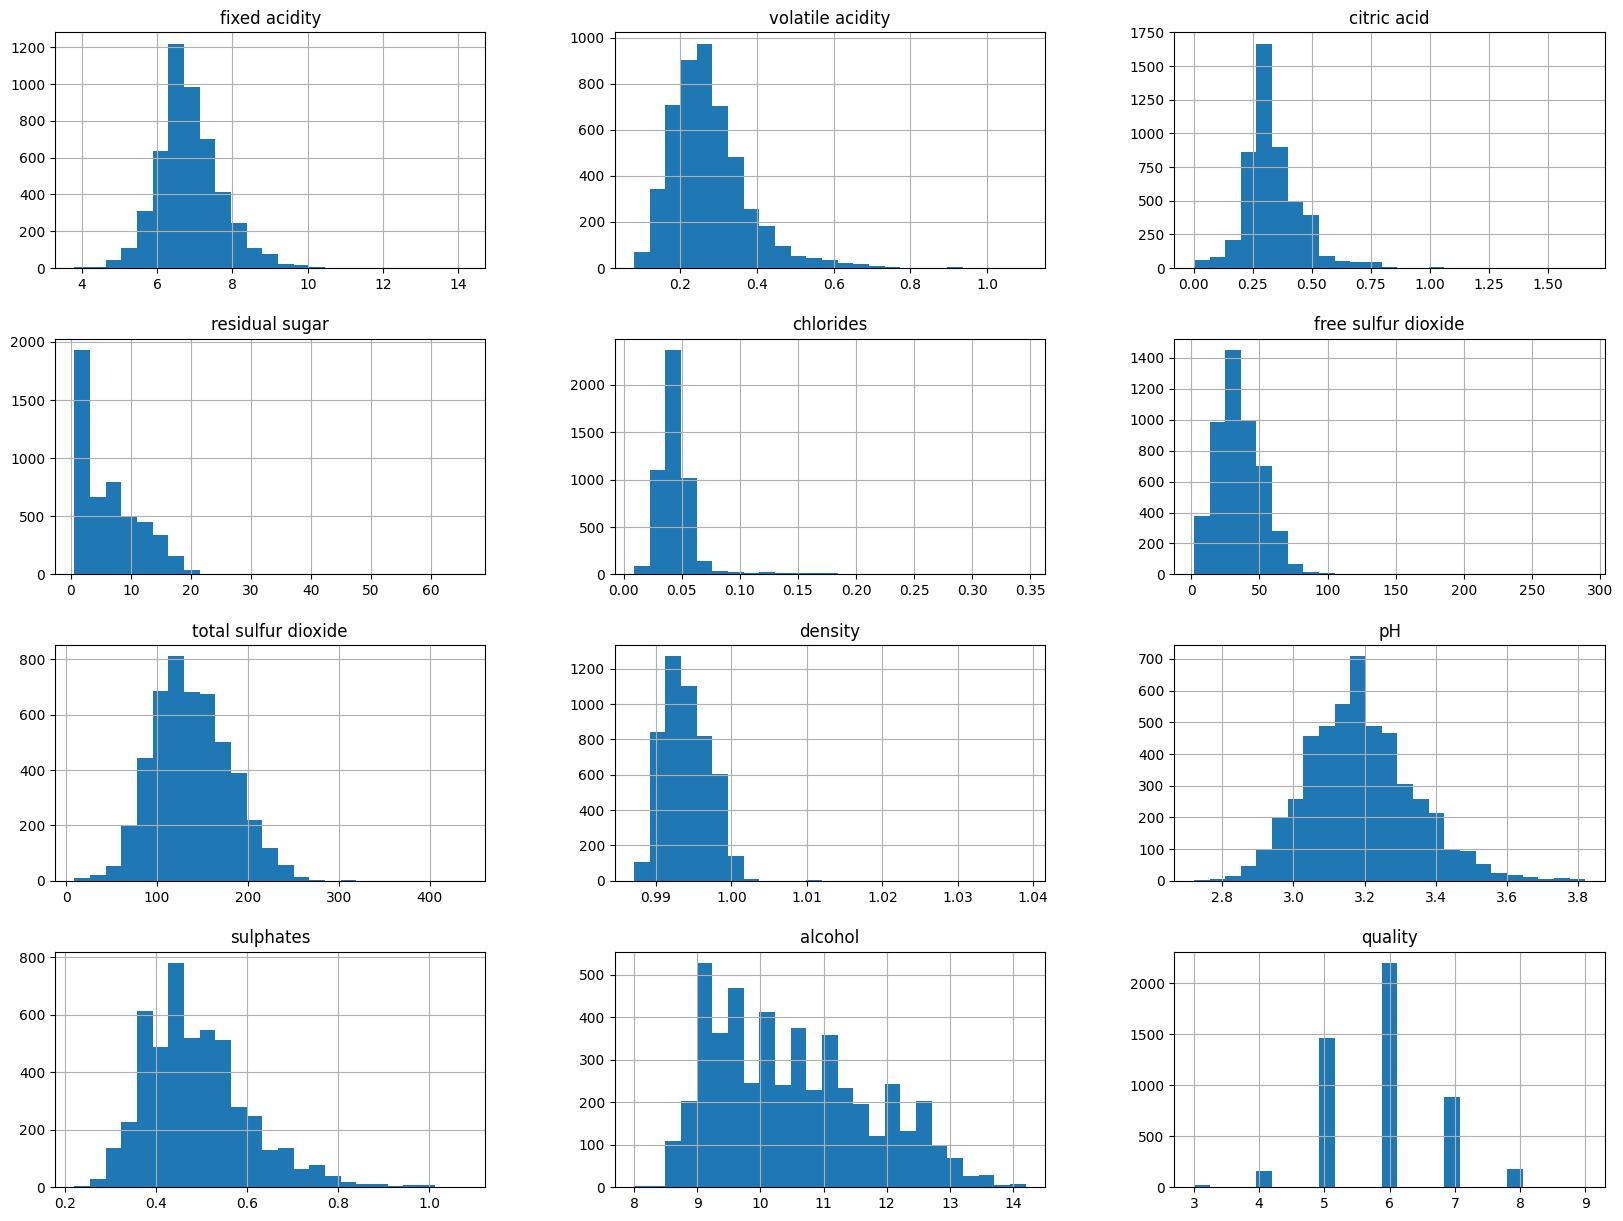

In [7]:
data.hist(bins=25, figsize=(20,15))
plt.show()

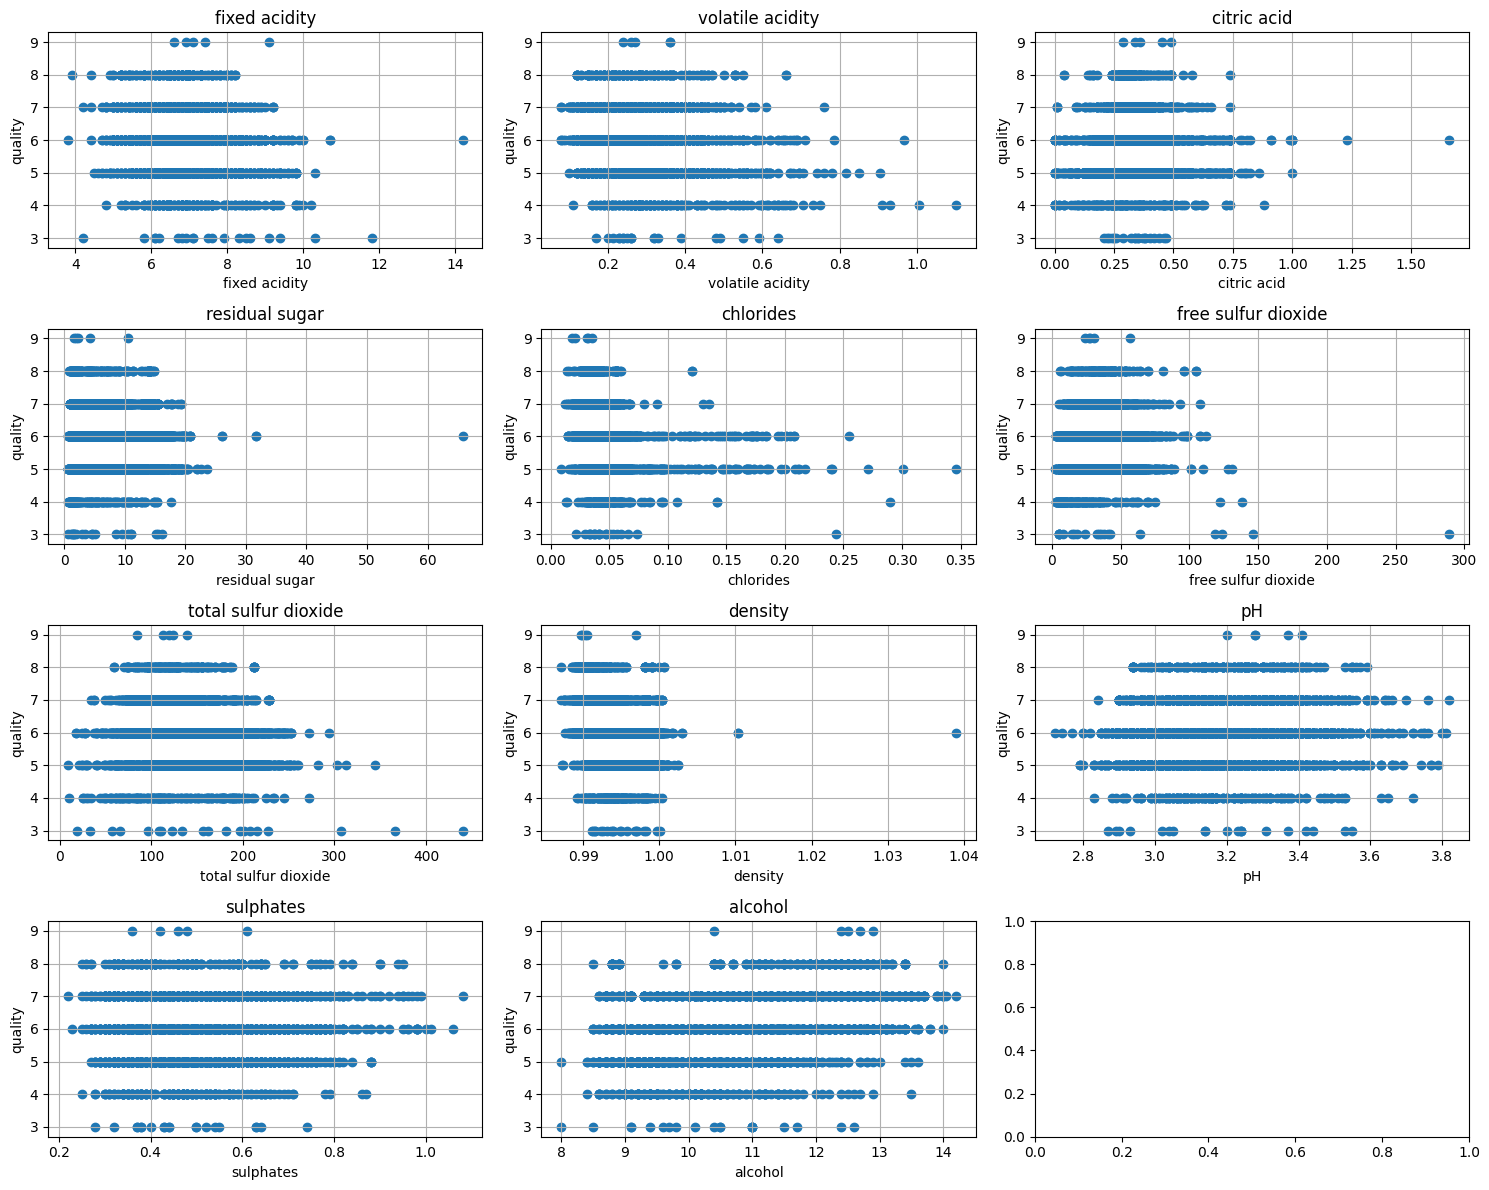

In [8]:
features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Iterate through features and create scatter plots
for i, feature in enumerate(features):
    axes[i].scatter(x=data[feature], y=data['quality'])
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('quality')
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
# Calculating the correlation using all the data
correlation_data = []

for feature in features:
    corr = np.corrcoef(x=data[feature], y=data['quality'])[0, 1]
    correlation_data.append([feature, corr])

# Create a fancy table
table_headers = ["Feature", "Correlation"]
table = tabulate(correlation_data, headers=table_headers, tablefmt="mixed_grid", numalign="right", stralign="right", floatfmt=(".3f", ".3f"))

print(table)

┍━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┑
│              Feature │   Correlation │
┝━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┥
│        fixed acidity │        -0.114 │
├──────────────────────┼───────────────┤
│     volatile acidity │        -0.195 │
├──────────────────────┼───────────────┤
│          citric acid │        -0.009 │
├──────────────────────┼───────────────┤
│       residual sugar │        -0.098 │
├──────────────────────┼───────────────┤
│            chlorides │        -0.210 │
├──────────────────────┼───────────────┤
│  free sulfur dioxide │         0.008 │
├──────────────────────┼───────────────┤
│ total sulfur dioxide │        -0.175 │
├──────────────────────┼───────────────┤
│              density │        -0.307 │
├──────────────────────┼───────────────┤
│                   pH │         0.099 │
├──────────────────────┼───────────────┤
│            sulphates │         0.054 │
├──────────────────────┼───────────────┤
│              alcohol │         0.436 │
┕━━━━━━━━━━━━━━━

In [10]:
# Calculating the correlation using just train data the data
correlation_data = []

for i, feature in enumerate(features):
    corr = np.corrcoef(x=X_train[:, i], y=y_train)[0, 1]
    correlation_data.append([feature, corr])

# Create a fancy table
table_headers = ["Feature", "Correlation"]
table = tabulate(correlation_data, headers=table_headers, tablefmt="mixed_grid", numalign="right", stralign="right", floatfmt=(".3f", ".3f"))

print(table)

┍━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━┑
│              Feature │   Correlation │
┝━━━━━━━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━━┥
│        fixed acidity │        -0.136 │
├──────────────────────┼───────────────┤
│     volatile acidity │        -0.193 │
├──────────────────────┼───────────────┤
│          citric acid │        -0.025 │
├──────────────────────┼───────────────┤
│       residual sugar │        -0.100 │
├──────────────────────┼───────────────┤
│            chlorides │        -0.203 │
├──────────────────────┼───────────────┤
│  free sulfur dioxide │         0.029 │
├──────────────────────┼───────────────┤
│ total sulfur dioxide │        -0.157 │
├──────────────────────┼───────────────┤
│              density │        -0.304 │
├──────────────────────┼───────────────┤
│                   pH │         0.104 │
├──────────────────────┼───────────────┤
│            sulphates │         0.047 │
├──────────────────────┼───────────────┤
│              alcohol │         0.433 │
┕━━━━━━━━━━━━━━━

Calculate the weights for linear regression. Using ordinary least squares (OLS), one can derive the following  expression:


$$ 
\vec{\bf{w}}= (\bf{X}^T \bf{X})^{-1} \bf{X}^T \vec{\bf{y}}
$$ 

Numpy provides functions for matrix manipulation (https://numpy.org/doc/stable/reference/routines.array-manipulation.html). Here, one can use the following: 

*  **np.matmul** for matrix multiplication
*  **.T** for matrix transposition
*  **np.linalg.inv** for matrix inversion
    

In [12]:
w1 = np.matmul(X_train.T, X_train)
w2 = np.linalg.inv(w1)
w3 = np.matmul(w2, X_train.T)
w = np.matmul(w3, y_train)

Use the weights to construct a linear model and predict the target variable on the test set. Compare your predictions with the true values of the target variable (ground truth). Calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

In [18]:
y_pred = np.matmul(X_test, w)

Correlation coefficient: 0.5191881035558353


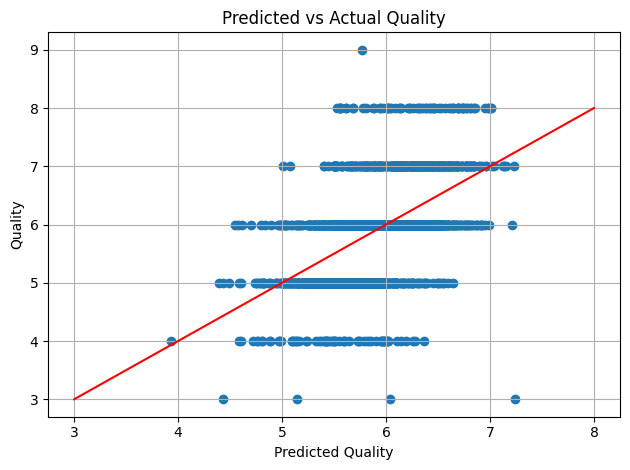

In [25]:
print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])

# Iterate through features and create scatter plots
plt.scatter(x = y_pred, y = y_test)
plt.plot([3, 8], [3, 8], 'r-')
plt.title('Predicted vs Actual Quality')
plt.xlabel('Predicted Quality')
plt.ylabel('Quality')
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()